In [45]:
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# profiling figure for B
B_list = [50, 100, 200, 400]
k_list = [10]
B12_list = [[5, 200], [10, 200], [20, 50], [20, 100], [20, 200], [40, 200], [20, 400]]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_B.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

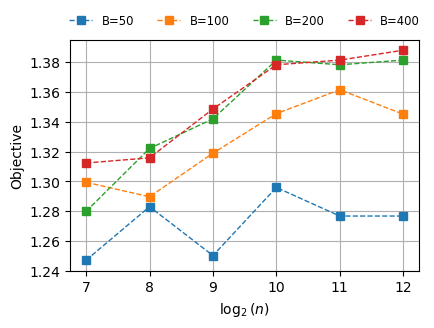

In [4]:
# algorithm 1, choose B
_, ax = plt.subplots(figsize = (4.5, 3))
# ax.plot(np.log2(sample_number), SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')

for ind, B in enumerate(B_list):
    ax.plot(np.log2(sample_number), bagging_alg1_obj_avg[ind][0], marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B={B}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg1_B.png", bbox_inches = "tight")
plt.show()

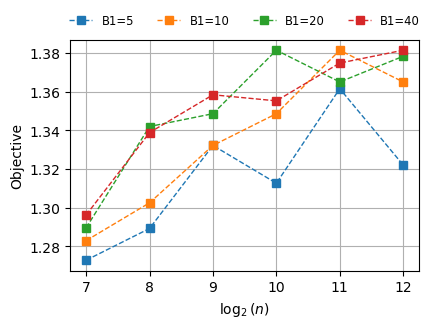

In [5]:
# algorithm 3, choose B1
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    ax.plot(np.log2(sample_number), bagging_alg3_obj_avg[ind][0], marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B1={B12[0]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B1.png", bbox_inches = "tight")
plt.show()

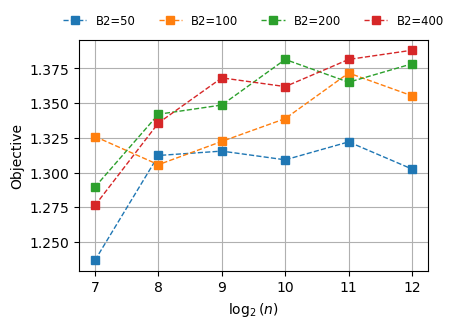

In [6]:
# algorithm 3, choose B2
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    ax.plot(np.log2(sample_number), bagging_alg3_obj_avg[ind][0], marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B2={B12[1]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_B2.png", bbox_inches = "tight")
plt.show()

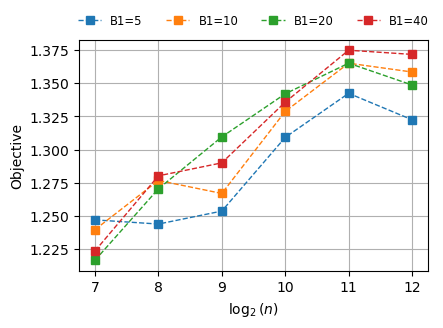

In [7]:
# algorithm 4, choose B1
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    ax.plot(np.log2(sample_number), bagging_alg4_obj_avg[ind][0], marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B1={B12[0]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B1.png", bbox_inches = "tight")
plt.show()

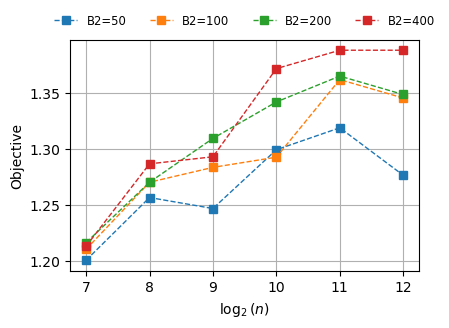

In [8]:
# algorithm 4, choose B2
_, ax = plt.subplots(figsize = (4.5, 3))

for ind, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    ax.plot(np.log2(sample_number), bagging_alg4_obj_avg[ind][0], marker = 's', linestyle = '--', linewidth = 1, 
            label=f"B2={B12[1]}")

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./profiling/profiling_alg4_B2.png", bbox_inches = "tight")
plt.show()

In [42]:
# profiling figure for k (two examples)
B_list = [200]
k_list = [0.05, 0.1, 0.2, 0.4, 2, 10, 20, 50]
B12_list = [(20,200)]
sample_number = [128, 256, 512, 1024, 2048, 4096]

# with open("./profiling/obj_lists_k_1.json", "r") as f:
with open("./profiling/obj_lists_k_2.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

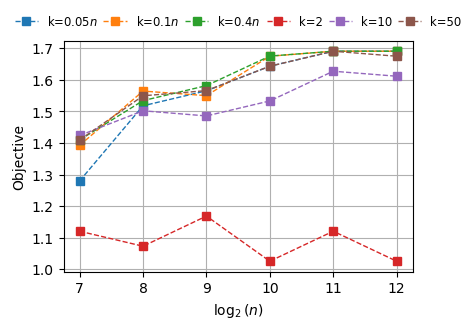

In [44]:
# algorithm 1, choose k parameter1
_, ax = plt.subplots(figsize = (4.5, 3))
# ax.plot(np.log2(sample_number), SAA_obj_avg, marker = 'o', markeredgecolor = 'none', color = 'blue',linestyle = 'solid', linewidth = 2, label = 'SAA')

for ind, k in enumerate(k_list):
    if k not in [0.2, 20]:
        label_name = f"k={k}" if k > 1 else f"k=${k}n$"
        ax.plot(np.log2(sample_number), bagging_alg1_obj_avg[0][ind], marker = 's', linestyle = '--', linewidth = 1, 
            label=label_name)

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True)
# plt.savefig("./profiling/profiling_alg1_k_1.png", bbox_inches = "tight")
plt.savefig("./profiling/profiling_alg1_k_2.png", bbox_inches = "tight")
plt.show()

In [64]:
# epsilon profile (one figure for single solution, one figure for multi solution)
B = 200
k = 10
B12 = (20, 200)
epsilon_list =  [
  0,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  1.0,
  2.0,
  "dynamic"
 ]
plot_list = [0, 4, 6, 8, 10]
sample_number = [64, 128, 256, 512, 1024, 2048, 4096]

# the one with multiple solution
with open("./profiling/obj_lists_epsilon_1.json", "r") as f:
    obj_lists = json.load(f)

# the one not with multiple solution
# with open("./profiling/obj_lists_epsilon_2.json", "r") as f:
#     obj_lists = json.load(f)


print(obj_lists.keys())

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


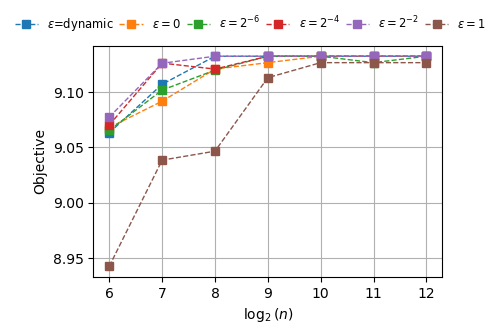

In [65]:
_, ax = plt.subplots(figsize = (4.5, 3))

ax.plot(np.log2(sample_number), bagging_alg3_obj_avg[ind], marker = 's', linestyle = '--', linewidth = 1, label=f"$\epsilon$=dynamic")

for item in plot_list:
    if epsilon_list[item] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{ {int(np.log2(epsilon_list[item]))} }}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[item])}$"
    ax.plot(np.log2(sample_number), bagging_alg3_obj_avg[item], marker = 's', linestyle = '--', linewidth = 1, label=label_name)        

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.45, 1.01), ncol=6, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True)
plt.savefig("./profiling/profiling_alg3_epsilon_1.png", bbox_inches = "tight")
# plt.savefig("./profiling/profiling_alg3_epsilon_2.png", bbox_inches = "tight")
plt.show()